In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

movieData = pd.read_csv("../input/movies/Dataset.csv")

In [88]:
movieData.describe()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
count,231.000000,231.000000,231.000000,2.310000e+02,2.300000e+02,221.000000,231.000000,231.000000,2.310000e+02,231.000000,231.000000,231.000000,1.960000e+02
mean,2014.294372,6.441558,5.359307,6.806603e+07,4.792173e+07,2209.244344,1.359307,2.809524,3.712851e+06,12732.536797,679.051948,1825.701299,3.038193e+06
std,0.456750,0.988765,4.141611,8.890289e+07,5.428825e+07,1463.767755,0.967241,6.996775,4.511104e+06,28825.484481,1243.929481,3571.040447,4.886278e+06
min,2014.000000,3.100000,1.000000,2.470000e+03,7.000000e+04,2.000000,1.000000,-38.000000,6.980000e+02,1.000000,0.000000,0.000000,1.066000e+03
25%,2014.000000,5.800000,1.000000,1.030000e+07,9.000000e+06,449.000000,1.000000,0.000000,6.233020e+05,1776.500000,105.500000,248.500000,1.830250e+05
50%,2014.000000,6.500000,3.000000,3.740000e+07,2.800000e+07,2777.000000,1.000000,0.000000,2.409338e+06,6096.000000,341.000000,837.000000,1.052600e+06
75%,2015.000000,7.100000,8.000000,8.935000e+07,6.500000e+07,3372.000000,1.000000,5.500000,5.217380e+06,15247.500000,697.500000,2137.000000,3.694500e+06
max,2015.000000,8.700000,15.000000,6.430000e+08,2.500000e+08,4324.000000,7.000000,29.000000,3.262678e+07,370552.000000,13960.000000,38363.000000,3.103000e+07


In [89]:
movieData['AggregFollowers'] = movieData['Aggregate Followers'] #creating new column in the dataframe to hold the variable aggregate followers (the only difference is the name that doesn't have a space)

movieData.Budget[movieData['Budget'].isna()] = np.median(movieData.Budget[np.isfinite(movieData['Budget'])]) #filling Nas by median
movieData.Screens[movieData['Screens'].isna()] = np.median(movieData.Screens[np.isfinite(movieData['Screens'])])
movieData.AggregFollowers[movieData['AggregFollowers'].isna()] = np.median(movieData.AggregFollowers[np.isfinite(movieData['AggregFollowers'])])

del movieData['Aggregate Followers']#deleting the column where there is a space in name of variable
#del movieData['Year']

movieData.isna().sum() #seeing how many Nas are there in every variable

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Movie              0
Year               0
Ratings            0
Genre              0
Gross              0
Budget             0
Screens            0
Sequel             0
Sentiment          0
Views              0
Likes              0
Dislikes           0
Comments           0
AggregFollowers    0
dtype: int64

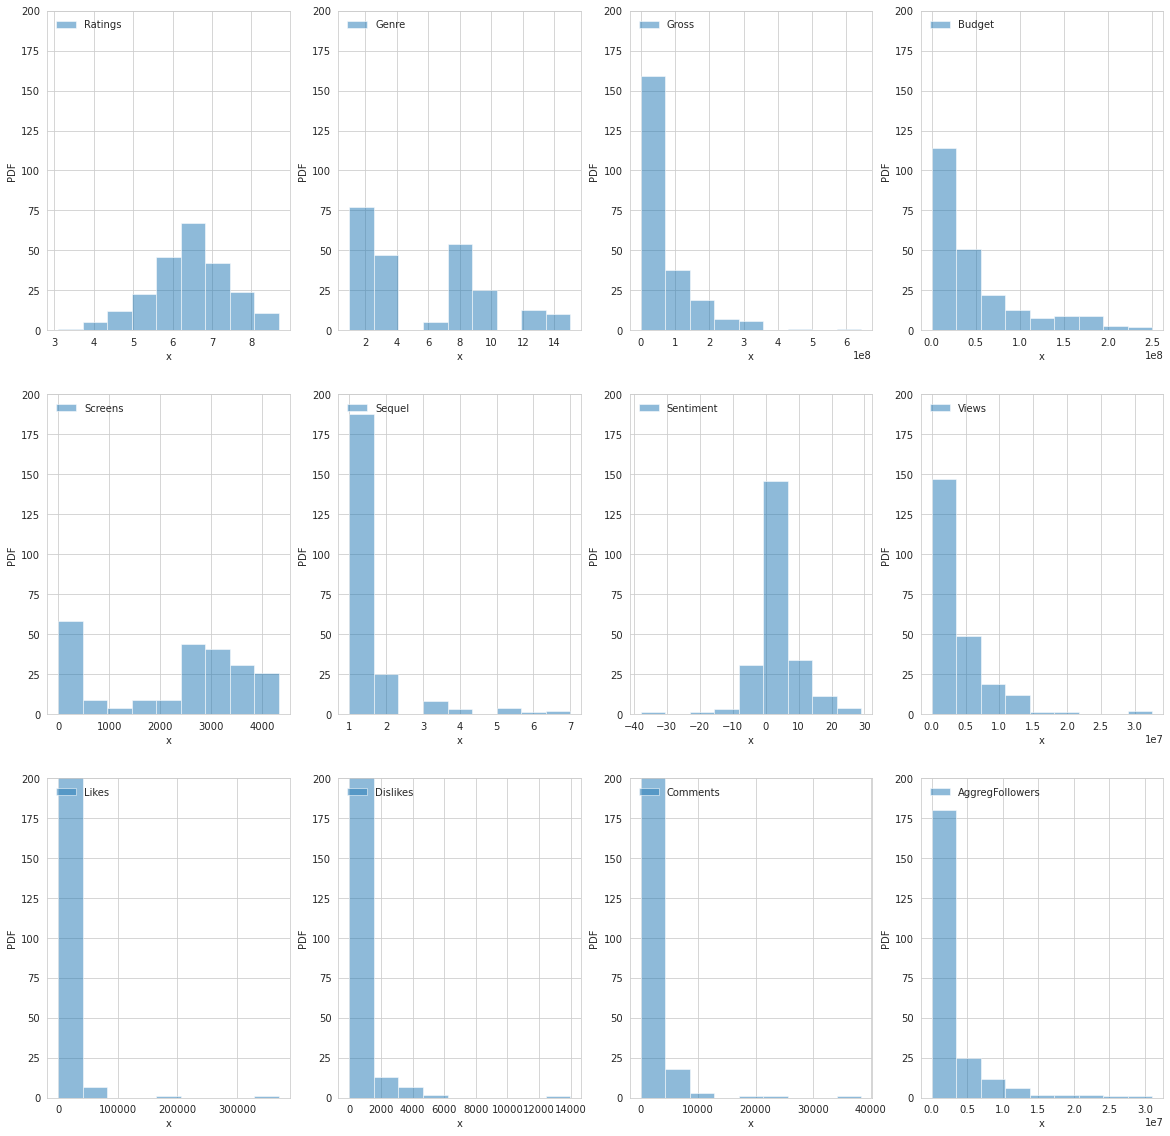

In [90]:
# Generically define how many plots along and across
ncols = 4
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Lazy counter so we can remove unwated axes
counter = 2
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(movieData.columns):

            ax.hist(movieData[movieData.columns[counter]], bins=9,  alpha=0.5, label='{}'.format(movieData.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('PDF')
            ax.set_ylim([0, 200])
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

# HEATMAP OF NUM VARS

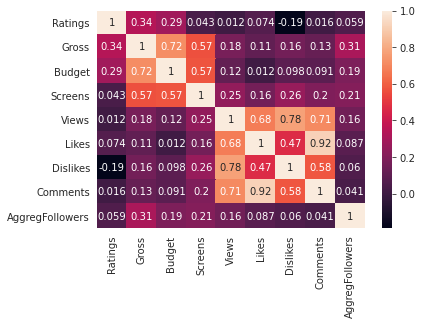

In [91]:
#creating data frame that only has numeric variables
numVars = movieData[['Ratings','Gross','Budget','Screens','Views','Likes','Dislikes','Comments','AggregFollowers']]
import seaborn as sn
corrMatrix = numVars.corr() #creating correlation matrix
sn.heatmap(corrMatrix, annot=True) #--> {GROSS-BUDGET-SCREENS} {VIEWS-LIKES-DISLIKES-COMMENTS} visualizing matrix

In [92]:
movieData.Sentiment[movieData['Sentiment'] > 0] = 1 # positive sentiments get value 1
movieData.Sentiment[movieData['Sentiment'] < 0] = 2 # negative sentiments get value 2
#movieData.dtypes

movieData['Year'] = movieData['Year'].astype('category') #chancing variable type to categorical
movieData['Sentiment'] = movieData['Sentiment'].astype('category')
movieData['Genre'] = movieData['Genre'].astype('category')
movieData['Sequel'] = movieData['Sequel'].astype('category')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# EVOLUTION OF GROSS ~ CATEGORICAL VARIABLES

**GROSS ~ YEAR**

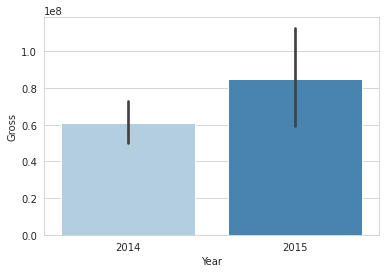

In [93]:
sns.barplot(x = 'Year', y = 'Gross',  data = movieData,
            palette = 'Blues', edgecolor = 'w')

plt.show()

** GROSS ~ SENTIMENT**


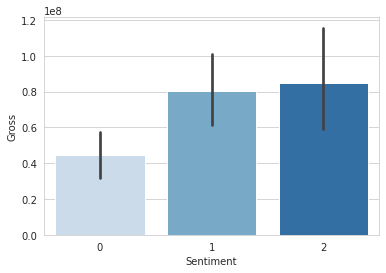

In [94]:
sns.barplot(x = 'Sentiment', y = 'Gross', data = movieData,
            palette = 'Blues', edgecolor = 'w')
movieData.groupby(['Sentiment']).mean() #calculating the mean of gross for each category of sentiment

plt.show()

**GROSS~GENRE**

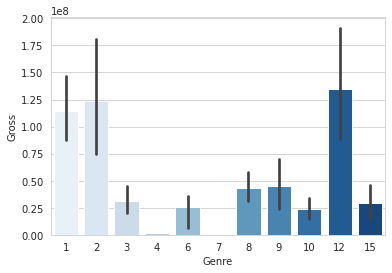

In [95]:
sns.barplot(x = 'Genre', y = 'Gross', data = movieData,
            palette = 'Blues', edgecolor = 'w')
movieData.groupby(['Genre']).mean() #calculating the mean of gross for each category of genre

plt.show()

#movieData[movieData.Genre==14]

In [96]:
movieData["Genre"].value_counts()

1     65
8     54
3     46
12    13
9     13
10    12
2     12
15    10
6      3
7      2
4      1
Name: Genre, dtype: int64

**GROSS ~ SEQUEL**

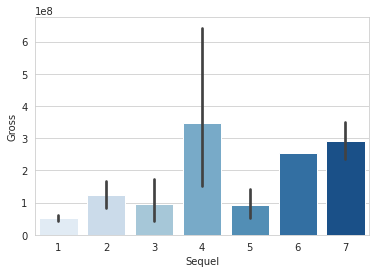

In [97]:
sns.barplot(x = 'Sequel', y = 'Gross',  data = movieData,
            palette = 'Blues', edgecolor = 'w')
movieData.groupby(['Sequel']).mean() #calculating the mean of gross for each category of sequel

plt.show()

# EVOLUTION OF GROSS ~ NUMERICAL VARIABLES

** GROSS ~ RATINGS**

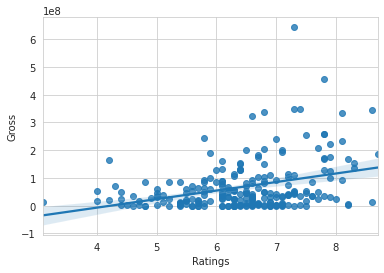

In [98]:
sns.regplot(x="Ratings", y="Gross", data=movieData); #scatter plot to see if there's a linear relationship between variables

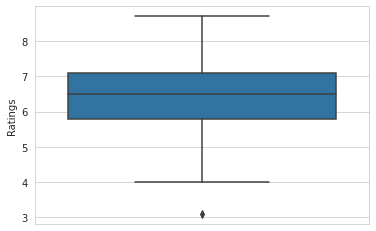

In [99]:
ax = sns.boxplot(y=movieData["Ratings"])
#print(np.percentile(movieData["Ratings"],25))
#print(np.percentile(movieData["Ratings"],75))
#print(np.percentile(movieData["Ratings"],50))
#print(np.min(movieData["Ratings"]))
#print(np.max(movieData["Ratings"]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: Setti

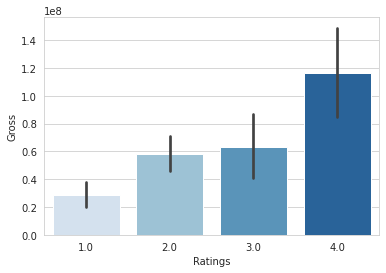

In [100]:
movieData['Ratings'] = movieData['Ratings'].astype('float')

numToCategory = movieData

#numToCategory['Ratings'] = numToCategory['Ratings'].astype('str')

numToCategory.Ratings[numToCategory["Ratings"].between(0,5.8,inclusive=False)] = 1 #ratings with values between 0 and 5.8 (min and first quartile) take value 1
numToCategory.Ratings[numToCategory["Ratings"].between(5.8,6.5,inclusive=True)] = 2 #ratings with values between 5.8 and 6.5 (first quartile and median) take value 2
numToCategory.Ratings[numToCategory["Ratings"].between(6.5,7.1,inclusive=False)] = 3 # between median and 3rd quartile
numToCategory.Ratings[numToCategory["Ratings"].between(7.1,10,inclusive=True)] = 4 #3rd quartile and max

# SAME THING IS REPEATED FOR ALL OTHER VARIABLES, WE GROUP VALUES OF THAT VARIABLE IN 4 GROUPS AS DESCRIBED ABOVE (QUARTILES)

numToCategory['Ratings'] = numToCategory['Ratings'].astype('category') #changing type of variabke to categorical

sns.set_style("whitegrid")
sns.barplot(x = 'Ratings', y = 'Gross', data = numToCategory,
            palette = 'Blues', edgecolor = 'w')
numToCategory.groupby(['Ratings']).mean()

plt.show()

**GROSS ~ BUDGET**

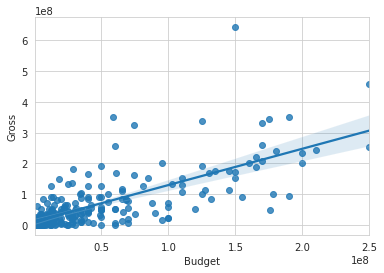

In [101]:
sns.regplot(x="Budget", y="Gross", data=movieData);

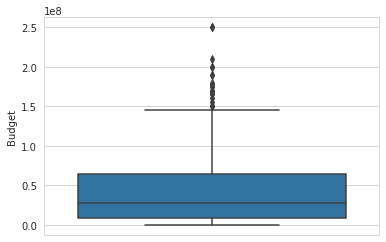

In [102]:
ax = sns.boxplot(y=movieData["Budget"])
#print(np.min(movieData["Budget"]))
#print(np.percentile(movieData["Budget"],25))
#print(np.percentile(movieData["Budget"],50))
#print(np.percentile(movieData["Budget"],75))
#print(np.max(movieData["Budget"]))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

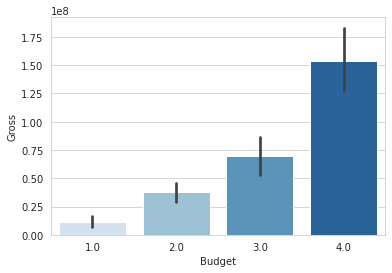

In [103]:
numToCategory = movieData

#numToCategory['Ratings'] = numToCategory['Ratings'].astype('str')

numToCategory.Budget[numToCategory["Budget"].between(0,9000000,inclusive=False)] = 1
numToCategory.Budget[numToCategory["Budget"].between(9000000,28000000,inclusive=True)] = 2
numToCategory.Budget[numToCategory["Budget"].between(28000000,65000000,inclusive=False)] = 3
numToCategory.Budget[numToCategory["Budget"].between(65000000,250000000,inclusive=True)] = 4


numToCategory['Budget'] = numToCategory['Budget'].astype('category')

sns.set_style("whitegrid")
sns.barplot(x = 'Budget', y = 'Gross', data = numToCategory,
            palette = 'Blues', edgecolor = 'w')
numToCategory.groupby(['Budget']).mean()

plt.show()

**GROSS ~ SCREENS**

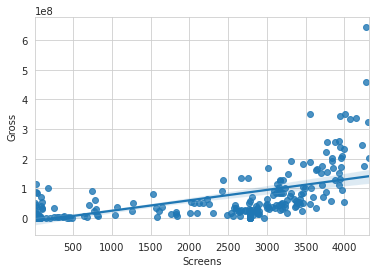

In [104]:
sns.regplot(x="Screens", y="Gross", data=movieData);

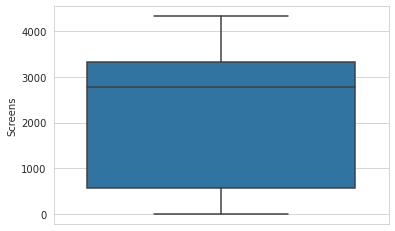

In [105]:
ax = sns.boxplot(y=movieData["Screens"])
#print(np.min(movieData["Screens"]))
#print(np.percentile(movieData["Screens"],25))
#print(np.percentile(movieData["Screens"],50))
#print(np.percentile(movieData["Screens"],75))
#print(np.max(movieData["Screens"]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

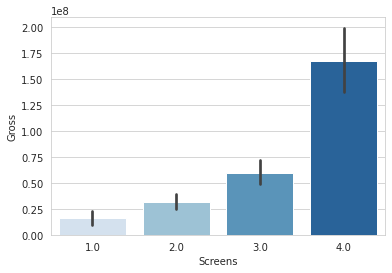

In [106]:
numToCategory = movieData

#numToCategory['Ratings'] = numToCategory['Ratings'].astype('str')

numToCategory.Screens[numToCategory["Screens"].between(0,563.5,inclusive=False)] = 1
numToCategory.Screens[numToCategory["Screens"].between(563.5,2777,inclusive=True)] = 2
numToCategory.Screens[numToCategory["Screens"].between(2777,3334,inclusive=False)] = 3
numToCategory.Screens[numToCategory["Screens"].between(3334,4324,inclusive=True)] = 4


numToCategory['Screens'] = numToCategory['Screens'].astype('category')

sns.set_style("whitegrid")
sns.barplot(x = 'Screens', y = 'Gross', data = numToCategory,
            palette = 'Blues', edgecolor = 'w')
numToCategory.groupby(['Screens']).mean()

plt.show()

**GROSS~VIEWS**

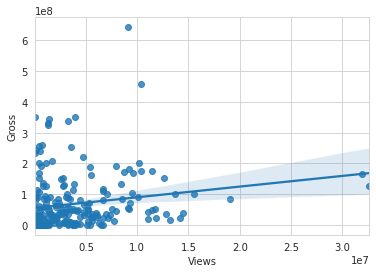

In [107]:
sns.regplot(x="Views", y="Gross", data=movieData);

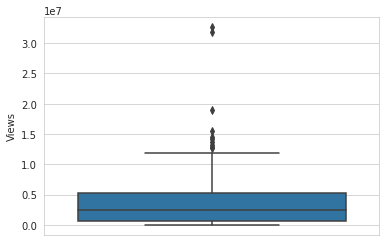

In [108]:
ax = sns.boxplot(y=movieData["Views"])
#print(np.min(movieData["Views"]))
#print(np.percentile(movieData["Views"],25))
#print(np.percentile(movieData["Views"],50))
#print(np.percentile(movieData["Views"],75))
#print(np.max(movieData["Views"]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

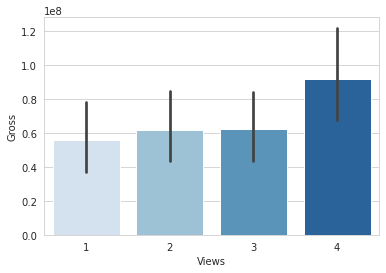

In [109]:
numToCategory = movieData

#numToCategory['Ratings'] = numToCategory['Ratings'].astype('str')

numToCategory.Views[numToCategory["Views"].between(0,623302,inclusive=False)] = 1
numToCategory.Views[numToCategory["Views"].between(623302,2409338,inclusive=True)] = 2
numToCategory.Views[numToCategory["Views"].between(2409338,5217379.5,inclusive=False)] = 3
numToCategory.Views[numToCategory["Views"].between(5217379.5,32626778,inclusive=True)] = 4


numToCategory['Views'] = numToCategory['Views'].astype('category')

sns.set_style("whitegrid")
sns.barplot(x = 'Views', y = 'Gross', data = numToCategory,
            palette = 'Blues', edgecolor = 'w')
numToCategory.groupby(['Views']).mean()

plt.show()

**GROSS ~ LIKES**

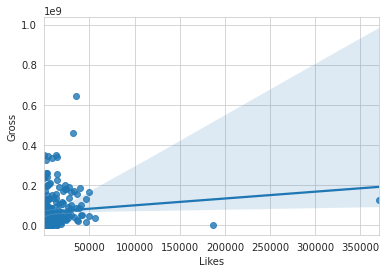

In [110]:
sns.regplot(x="Likes", y="Gross", data=movieData);

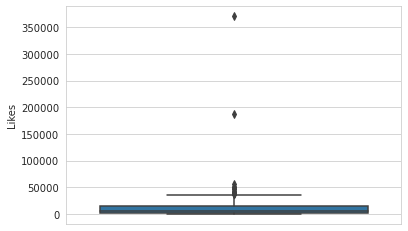

In [111]:
ax = sns.boxplot(y=movieData["Likes"])
#print(np.min(movieData["Likes"]))
#print(np.percentile(movieData["Likes"],25))
#print(np.percentile(movieData["Likes"],50))
#print(np.percentile(movieData["Likes"],75))
#print(np.max(movieData["Likes"]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

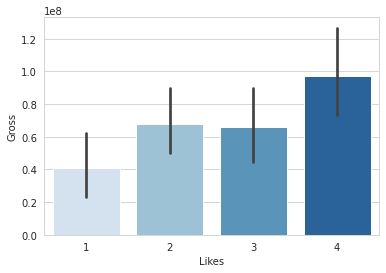

In [112]:
numToCategory = movieData

#numToCategory['Ratings'] = numToCategory['Ratings'].astype('str')

numToCategory.Likes[numToCategory["Likes"].between(0,1776.5,inclusive=False)] = 1
numToCategory.Likes[numToCategory["Likes"].between(1776.5,6096,inclusive=True)] = 2
numToCategory.Likes[numToCategory["Likes"].between(6096,15247.5,inclusive=False)] = 3
numToCategory.Likes[numToCategory["Likes"].between(15247.5,370552,inclusive=True)] = 4


numToCategory['Likes'] = numToCategory['Likes'].astype('category')

sns.set_style("whitegrid")
sns.barplot(x = 'Likes', y = 'Gross', data = numToCategory,
            palette = 'Blues', edgecolor = 'w')
numToCategory.groupby(['Likes']).mean()

plt.show()

**GROSS ~ DISLIKES**

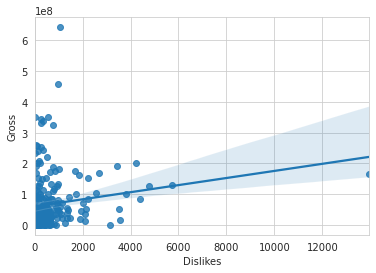

In [113]:
sns.regplot(x="Dislikes", y="Gross", data=movieData);

(0.0, 6500.0)

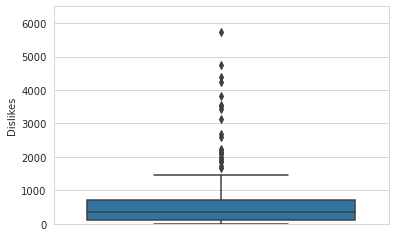

In [114]:
ax = sns.boxplot(y=movieData["Dislikes"])
ax.set_ylim([0, 6500]) 
#print(np.min(movieData["Dislikes"]))
#print(np.percentile(movieData["Dislikes"],25))
#print(np.percentile(movieData["Dislikes"],50))
#print(np.percentile(movieData["Dislikes"],75))
#print(np.max(movieData["Dislikes"]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

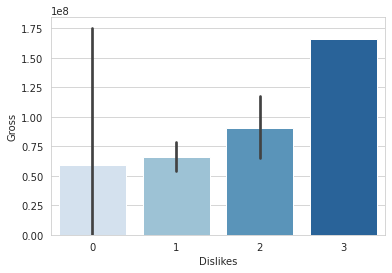

In [115]:
numToCategory = movieData

#numToCategory['Ratings'] = numToCategory['Ratings'].astype('str')

numToCategory.Dislikes[numToCategory["Dislikes"].between(0,1776.5,inclusive=False)] = 1
numToCategory.Dislikes[numToCategory["Dislikes"].between(1776.5,6096,inclusive=True)] = 2
numToCategory.Dislikes[numToCategory["Dislikes"].between(6096,15247.5,inclusive=False)] = 3
numToCategory.Dislikes[numToCategory["Dislikes"].between(15247.5,370552,inclusive=True)] = 4


numToCategory['Dislikes'] = numToCategory['Dislikes'].astype('category')

sns.set_style("whitegrid")
sns.barplot(x = 'Dislikes', y = 'Gross', data = numToCategory,
            palette = 'Blues', edgecolor = 'w')
numToCategory.groupby(['Dislikes']).mean()

plt.show()

**GROSS ~ COMMENTS**

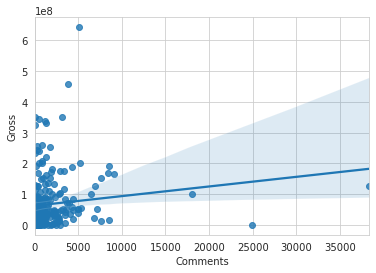

In [116]:
sns.regplot(x="Comments", y="Gross", data=movieData);

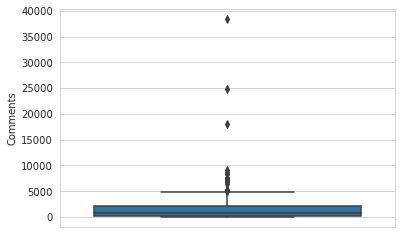

In [117]:
ax = sns.boxplot(y=movieData["Comments"])
#ax.set_ylim([0, 6500]) 
#print(np.min(movieData["Comments"]))
#print(np.percentile(movieData["Comments"],25))
#print(np.percentile(movieData["Comments"],50))
#print(np.percentile(movieData["Comments"],75))
#print(np.max(movieData["Comments"]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

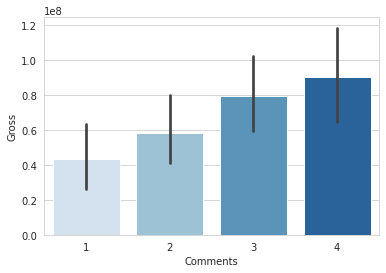

In [118]:
numToCategory = movieData

#numToCategory['Ratings'] = numToCategory['Ratings'].astype('str')

numToCategory.Comments[numToCategory["Comments"].between(-1,248.5,inclusive=False)] = 1
numToCategory.Comments[numToCategory["Comments"].between(248.5,837,inclusive=True)] = 2
numToCategory.Comments[numToCategory["Comments"].between(837,2137,inclusive=False)] = 3
numToCategory.Comments[numToCategory["Comments"].between(2137,38363,inclusive=True)] = 4


numToCategory['Comments'] = numToCategory['Comments'].astype('category')

sns.set_style("whitegrid")
sns.barplot(x = 'Comments', y = 'Gross', data = numToCategory,
            palette = 'Blues', edgecolor = 'w')
numToCategory.groupby(['Comments']).mean()

plt.show()

**GROSS ~ FOLLOWERS**

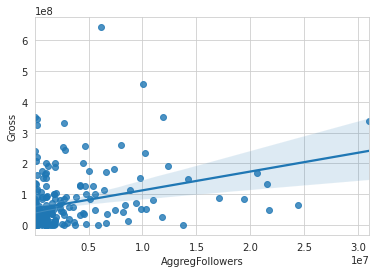

In [119]:
sns.regplot(x="AggregFollowers", y="Gross", data=movieData);

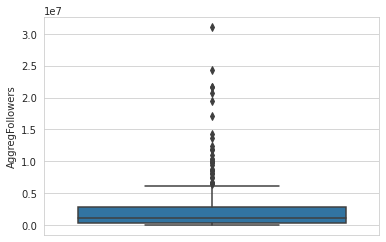

In [120]:
ax = sns.boxplot(y=movieData["AggregFollowers"])
#ax.set_ylim([0, 6500]) 
#print(np.min(movieData["AggregFollowers"]))
#print(np.percentile(movieData["AggregFollowers"],25))
#print(np.percentile(movieData["AggregFollowers"],50))
#print(np.percentile(movieData["AggregFollowers"],75))
#print(np.max(movieData["AggregFollowers"]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

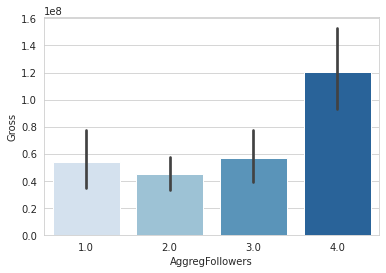

In [121]:
numToCategory = movieData

#numToCategory['Ratings'] = numToCategory['Ratings'].astype('str')

numToCategory.AggregFollowers[numToCategory["AggregFollowers"].between(1000,250000,inclusive=False)] = 1
numToCategory.AggregFollowers[numToCategory["AggregFollowers"].between(250000,1052600,inclusive=True)] = 2
numToCategory.AggregFollowers[numToCategory["AggregFollowers"].between(1052600,2735500,inclusive=False)] = 3
numToCategory.AggregFollowers[numToCategory["AggregFollowers"].between(2735500,31030000,inclusive=True)] = 4


numToCategory['AggregFollowers'] = numToCategory['AggregFollowers'].astype('category')

sns.set_style("whitegrid")
sns.barplot(x = 'AggregFollowers', y = 'Gross', data = numToCategory,
            palette = 'Blues', edgecolor = 'w')
numToCategory.groupby(['AggregFollowers']).mean()

plt.show()